In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
import GPy

In [8]:
import scipy.io as sio

In [9]:
df = sio.loadmat('snelson1d.mat')
X = df['X']
Y = df['Y']
X_t = df['tX']
Y_t = df['tY']


In [13]:
M = 20
X_u = np.linspace(0,6, M)[:, None]
X_u_noisy = X_u + 0.1*np.random.rand(*X_u.shape) 

In [45]:
lik = GPy.likelihoods.Gaussian()
kern = GPy.kern.RBF(X.shape[1]) + GPy.kern.White(X.shape[1])
kern1 = GPy.kern.RBF(X.shape[1]) + GPy.kern.White(X.shape[1])

In [46]:

m1 = GPy.core.GP(X, Y, kernel=kern, likelihood=lik.copy())

In [47]:
print(m1)


Name : gp
Objective : 272.5565738936652
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |  value  |  constraints  |  priors
  sum.rbf.variance         |    1.0  |      +ve      |        
  sum.rbf.lengthscale      |    1.0  |      +ve      |        
  sum.white.variance       |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [39]:
m1.randomize()

In [40]:
m1.optimize('lbfgs')

In [41]:
print(m1)


Name : gp
Objective : 55.90027668937918
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |   0.769165169121  |      +ve      |        
  sum.rbf.lengthscale      |   0.612342731842  |      +ve      |        
  sum.white.variance       |   0.056434839555  |      +ve      |        
  Gaussian_noise.variance  |  0.0232122447581  |      +ve      |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


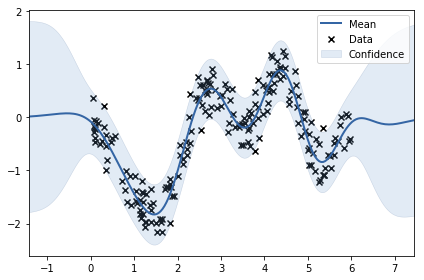

In [42]:
m1.plot()

In [44]:
gaussian_inference = GPy.inference.latent_function_inference.ExactGaussianInference()

In [49]:
m2 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=gaussian_inference)

In [50]:
print(m2)


Name : gp
Objective : 272.5565738936652
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |  value  |  constraints  |  priors
  sum.rbf.variance         |    1.0  |      +ve      |        
  sum.rbf.lengthscale      |    1.0  |      +ve      |        
  sum.white.variance       |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [51]:
m2.optimize('lbfgs')

In [52]:
print(m2)


Name : gp
Objective : 55.9002766893673
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |     0.7691643854  |      +ve      |        
  sum.rbf.lengthscale      |   0.612342652028  |      +ve      |        
  sum.white.variance       |  0.0398235570265  |      +ve      |        
  Gaussian_noise.variance  |  0.0398235570265  |      +ve      |        


In [53]:
laplace_inference = GPy.inference.latent_function_inference.Laplace()

In [54]:
m3 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=laplace_inference)

In [55]:
m3.optimize('lbfgs')

In [57]:
print(m3)


Name : gp
Objective : 55.900276689367196
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |   0.769164385365  |      +ve      |        
  sum.rbf.lengthscale      |   0.612342652024  |      +ve      |        
  sum.white.variance       |  0.0398235620243  |      +ve      |        
  Gaussian_noise.variance  |  0.0398235620287  |      +ve      |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


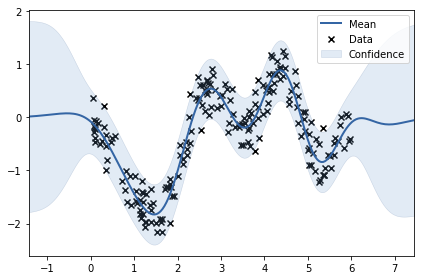

In [58]:
m2.plot()

In [59]:
fitc_inference = GPy.inference.latent_function_inference.FITC()
dtc_inference = GPy.inference.latent_function_inference.DTC()

In [73]:
# m4 = GPy.core.SparseGP(X, Y, Z=X_u_noisy, kernel=kern1.copy(), likelihood=lik.copy(), X_variance=None, inference_method=dtc_inference)

In [65]:
m5 = GPy.core.SparseGP(X, Y, Z=X_u_noisy.copy(), kernel=kern1.copy(),  likelihood=lik.copy(), inference_method=fitc_inference)

In [69]:
print(m5)


Name : sparse gp
Objective : 281.9299607803368
Number of Parameters : 24
Number of Optimization Parameters : 24
Updates : True
Parameters:
  sparse_gp.               |    value  |  constraints  |  priors
  inducing_inputs          |  (20, 1)  |               |        
  sum.rbf.variance         |      1.0  |      +ve      |        
  sum.rbf.lengthscale      |      1.0  |      +ve      |        
  sum.white.variance       |      1.0  |      +ve      |        
  Gaussian_noise.variance  |      1.0  |      +ve      |        


In [70]:
m5.optimize('lbfgs')

In [71]:
print(m5)


Name : sparse gp
Objective : 49.86179787096353
Number of Parameters : 24
Number of Optimization Parameters : 24
Updates : True
Parameters:
  sparse_gp.               |              value  |  constraints  |  priors
  inducing_inputs          |            (20, 1)  |               |        
  sum.rbf.variance         |     0.760292757577  |      +ve      |        
  sum.rbf.lengthscale      |     0.486522026336  |      +ve      |        
  sum.white.variance       |    0.0338127742042  |      +ve      |        
  Gaussian_noise.variance  |  5.92108185246e-07  |      +ve      |        


In [74]:
m6 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=gaussian_inference)

In [76]:
# very general prior- non informative ..
gamma_prior3 = GPy.priors.Gamma.from_EV(1.0, 6.)

 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.


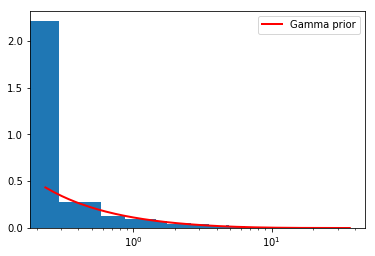

In [77]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xscale('log')
_= gamma_prior3.plot()
ax1.legend(['Gamma prior'])

reconstraining parameters gp.sum.rbf.lengthscale
reconstraining parameters gp.sum.rbf.variance
reconstraining parameters gp.Gaussian_noise.variance
 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


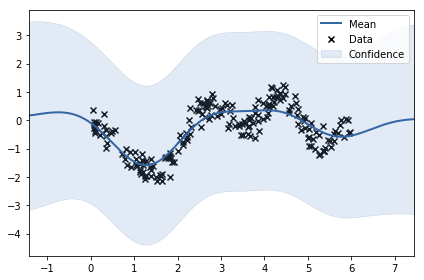

In [79]:
m6.kern.rbf.lengthscale.set_prior(gamma_prior3)
m6.kern.rbf.variance.set_prior(gamma_prior3)
m6.likelihood.variance.set_prior(gamma_prior3)
_=m6.plot()

In [80]:
hmc = GPy.inference.mcmc.HMC(m6, stepsize=5e-2)
# Burnin
s = hmc.sample(num_samples=1000)
s = hmc.sample(num_samples=2000)

In [85]:
samples = s[500:]
# thinning
samples = samples[::2]
labels = ['signal_variance' , 'lengthscale', 'noise_variance']

Text(0,0.5,'noise_variance')

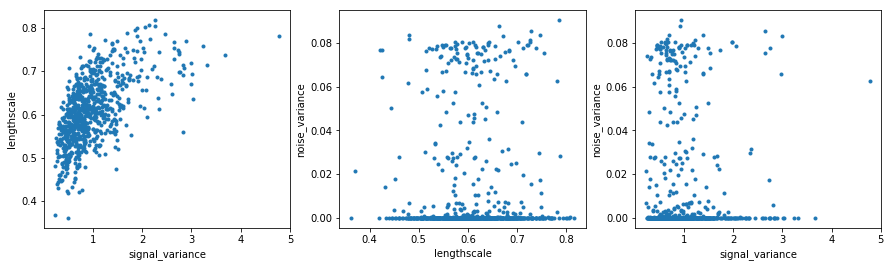

In [86]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
_=ax.plot(samples[:,0],samples[:,1],'.')
ax.set_xlabel(labels[0]); ax.set_ylabel(labels[1])
ax = fig.add_subplot(132)
_=ax.plot(samples[:,1],samples[:,2],'.')
ax.set_xlabel(labels[1]); ax.set_ylabel(labels[2])
ax = fig.add_subplot(133)
_=ax.plot(samples[:,0],samples[:,2],'.')
ax.set_xlabel(labels[0]); ax.set_ylabel(labels[2])


In [87]:
mean_values = np.mean(samples, axis=0)


Name : gp
Objective : 403.8690942133315
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |              value  |  constraints  |      priors    
  sum.rbf.variance         |     0.966901812394  |      +ve      |  Ga(0.17, 0.17)
  sum.rbf.lengthscale      |     0.608415580874  |      +ve      |  Ga(0.17, 0.17)
  sum.white.variance       |  4.18467526451e-12  |      +ve      |                
  Gaussian_noise.variance  |    0.0122203864101  |      +ve      |  Ga(0.17, 0.17)


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


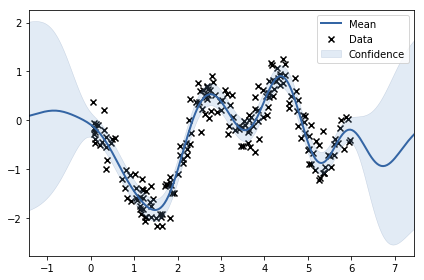

In [88]:
# set the model parameters at the posterior mean
m6.kern.rbf.variance[:] = mean_values[0]
m6.kern.rbf.lengthscale[:] = mean_values[1]
m6.likelihood.variance[:] = mean_values[2]
print(m6)
m6.plot()